# Assignment 12: Predicting Hotel Booking Cancellations  
## Models: Naïve Bayes, Support Vector Machine (SVM), and Neural Network

**Objectives:**
- Understand how to use classification models (Naïve Bayes, SVM, Neural Networks) to predict hotel cancellations.
- Compare models in terms of accuracy, complexity, and business relevance.
- Interpret and communicate model results from a business perspective.

## Business Scenario

You work as a data analyst for a hospitality group that manages both **Resort** and **City Hotels**. One major challenge in operations is the unpredictability of **booking cancellations**, which affects staffing, inventory, and revenue planning.

You’ve been asked to use historical booking data to predict whether a future booking will be canceled. Your insights will help management plan more effectively.


Your task is to:
1. Build and evaluate three models: Naïve Bayes, SVM, and Neural Network.
2. Compare performance.
3. Recommend which model is best suited for the business needs.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Load and Prepare the Hotel Booking Dataset

**Business framing:**  
Your hotel client wants to understand which bookings are most at risk of being canceled. But before modeling, your job is to prepare the data to ensure clean and reliable input.

### Do the following:
- Load the `hotels.csv` file from https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv
- Remove or impute missing values
- Encode categorical variables
- Create your `X` (features) and `y` (target = `is_canceled`)
- Split the data into training and test sets (70/30)

### In Your Response:
1. How many total rows and columns are in the dataset?
2. What types of features (categorical, numerical) are included?
3. What steps did you take to clean or prepare the data?


In [18]:
# Add code here 🔧
url= 'https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/refs/heads/main/DataSets/hotels.csv'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
import pandas as pd

df = pd.read_csv(url)

print(f"Initial number of rows: {df.shape[0]}")
print(f"Initial number of columns: {df.shape[1]}")

# Display missing values summary
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing values before cleaning:")
print(missing_values)


Initial number of rows: 119390
Initial number of columns: 32

Missing values before cleaning:
company     112593
agent        16340
country        488
children         4
dtype: int64


In [22]:
# Handle missing values

# Impute 'country' with 'Unknown' as it's a categorical variable
df['country'] = df['country'].fillna('Unknown')

# Impute 'children' with the median as it's a numerical variable (count)
df['children'] = df['children'].fillna(df['children'].median())

# For 'agent', impute with the median as it's a numerical identifier
df['agent'] = df['agent'].fillna(df['agent'].median())

# For 'company', drop the column due to a very high percentage of missing values
df.drop('company', axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\nNumber of rows after cleaning: {df.shape[0]}")
print(f"Number of columns after cleaning: {df.shape[1]}")


Missing values after cleaning:
Series([], dtype: int64)

Number of rows after cleaning: 119390
Number of columns after cleaning: 31


In [8]:
import pandas as pd

df = pd.read_csv(url)

print(f"Initial number of rows: {df.shape[0]}")
print(f"Initial number of columns: {df.shape[1]}")

# Display missing values summary
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing values before cleaning:")
print(missing_values)

Initial number of rows: 119390
Initial number of columns: 32

Missing values before cleaning:
company     112593
agent        16340
country        488
children         4
dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Drop reservation_status and reservation_status_date to prevent data leakage
df_processed = df.drop(columns=['reservation_status', 'reservation_status_date'])

# Separate target variable
y = df_processed['is_canceled']
X = df_processed.drop(columns=['is_canceled'])

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create a column transformer for one-hot encoding categorical features
# and passing through numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
# For simplicity, we'll use a placeholder for now, or convert to DataFrame if needed later
# If we convert to a DataFrame, we'll get proper column names.
# For now, let's keep it as a sparse matrix or numpy array as many models accept this.

# Convert to dense array for easier use with some models, if not too large
# Or, convert to DataFrame to keep column names if memory allows
if isinstance(X_processed, (np.ndarray, np.matrix)):
    X_final = X_processed
else: # it's a sparse matrix
    X_final = X_processed.toarray()

# Split the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print(f"\nCategorical features encoded: {list(categorical_features)}")
print(f"Numerical features passed through: {list(numerical_features)}")


Shape of X_train: (83573, 257)
Shape of X_test: (35817, 257)
Shape of y_train: (83573,)
Shape of y_test: (35817,)

Categorical features encoded: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
Numerical features passed through: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


### ✍️ Your Response: 🔧
1. 32 columns in the dataset and 119390 rows.

2. Both categorical and numeric features are included.

3. Filling in some values with children and dropping some values in agent to clean the data.

## 2. Build a Naïve Bayes Model

**Business framing:**  
Naïve Bayes is a quick, baseline model often used for early testing or simple classification problems.

### Do the following:
- Train a Naïve Bayes classifier on your training data
- Use it to predict on your test data
- Print a classification report and confusion matrix

### In Your Response:
1. How well does the model perform?  And what metric is best used to judge the performance?
2. Where might this model be useful for the hotel (e.g. real-time alerts, operational decisions)?


Naïve Bayes Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.32      0.47     22550
           1       0.44      0.91      0.60     13267

    accuracy                           0.54     35817
   macro avg       0.65      0.62      0.53     35817
weighted avg       0.71      0.54      0.52     35817


Confusion Matrix:
[[ 7287 15263]
 [ 1149 12118]]


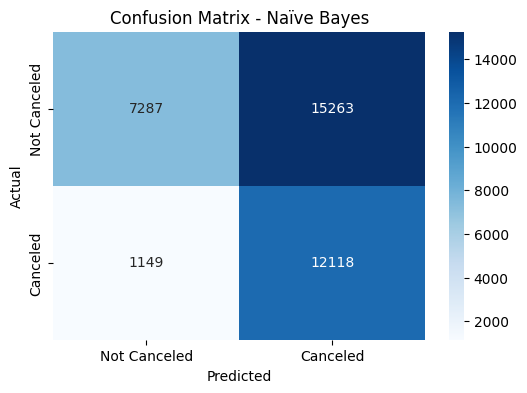

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Naïve Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
print("Naïve Bayes Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

### ✍️ Your Response: 🔧
1.This model does not perform well with the F1 score being around .54

2. The accuracy of the F1 score is the best indicator.

## 3. Build a Support Vector Machine (SVM) Model

**Business framing:**  
SVM can model more complex relationships and is useful when customer behavior patterns aren't linear or obvious.

### Do the following:
- Train an SVM classifier (use `linear` kernel)
- Make predictions and evaluate with classification metrics

### In Your Response:
1. How well does the model perform?  And what metric is best used to judge the performance?
2. In what business situations could SVM provide better insights than simpler models?


Training LinearSVC model... This should be faster.

Support Vector Machine (LinearSVC) Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     22550
           1       0.82      0.64      0.72     13267

    accuracy                           0.82     35817
   macro avg       0.82      0.78      0.79     35817
weighted avg       0.82      0.82      0.81     35817


Confusion Matrix:
[[20688  1862]
 [ 4758  8509]]


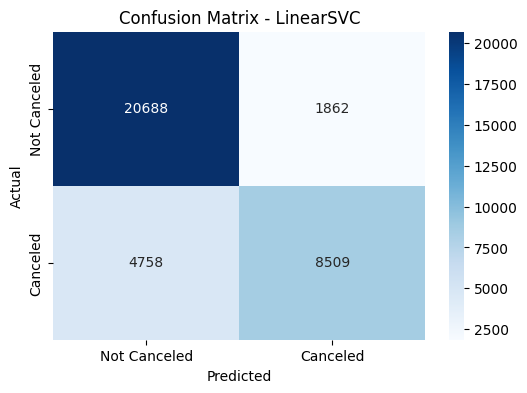

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Linear SVM model
# LinearSVC is generally much faster than SVC(kernel='linear') for large datasets.
# We set dual=False when n_samples > n_features, as recommended by sklearn for better performance.
# Adjust C for regularization if needed.
svm_model = LinearSVC(random_state=42, dual=False, max_iter=2000) # Increased max_iter for convergence

print("Training LinearSVC model... This should be faster.")
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machine (LinearSVC) Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LinearSVC')
plt.show()

### ✍️ Your Response: 🔧
1. This model performs significantly better than the Naive Bayes model because of the Linear Kernel analysis that was performed. Along with the accruacy and F1 score.

2. SVM models are better suited for analysis when the dataset has too many features, is dealing with a non-linear model, and the classes are not strongly identified; therefore, needing deeper analysis.

## 4. Build a Neural Network Model

**Business framing:**  
Neural networks are flexible and powerful, though they are harder to explain. They may work well when subtle patterns exist in the data.

### Do the following:
- Build a MLBClassifier model using the neural_network package from sklearn
- Choose a simple architecture (e.g., 2 hidden layers)
- Evaluate accuracy and performance

### In Your Response:
1. How does this model compare to the others?
2. Would the business be comfortable using a “black box” model like this? Why or why not?


Training Neural Network model... This might take some time.
Iteration 1, loss = 0.89547255
Validation score: 0.563532
Iteration 2, loss = 0.50288313
Validation score: 0.801747
Iteration 3, loss = 0.45789480
Validation score: 0.787150
Iteration 4, loss = 0.43588006
Validation score: 0.752453
Iteration 5, loss = 0.46586123
Validation score: 0.733549
Iteration 6, loss = 0.42798371
Validation score: 0.790261
Iteration 7, loss = 0.43960801
Validation score: 0.693108
Iteration 8, loss = 0.41694952
Validation score: 0.823762
Iteration 9, loss = 0.42602457
Validation score: 0.509691
Iteration 10, loss = 0.42240624
Validation score: 0.824480
Iteration 11, loss = 0.41681863
Validation score: 0.766451
Iteration 12, loss = 0.42200475
Validation score: 0.791218
Iteration 13, loss = 0.38884041
Validation score: 0.812754
Iteration 14, loss = 0.39987313
Validation score: 0.785954
Iteration 15, loss = 0.39124976
Validation score: 0.811199
Iteration 16, loss = 0.39550062
Validation score: 0.779253
Itera

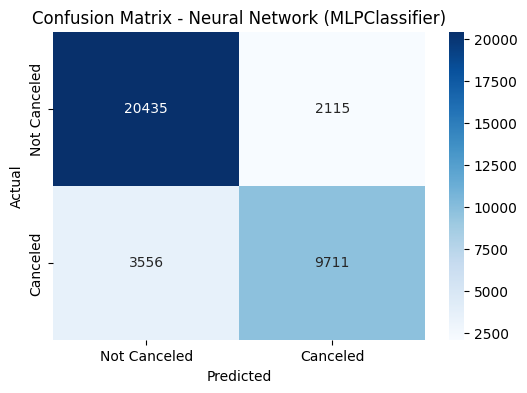

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Neural Network
# Using a simple architecture with 2 hidden layers (e.g., 100 neurons in the first, 50 in the second)
# max_iter is increased to allow for convergence
# alpha is the L2 regularization term parameter.
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42, verbose=True, early_stopping=True)

print("Training Neural Network model... This might take some time.")
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("\nNeural Network (MLPClassifier) Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

print("\nConfusion Matrix:")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(cm_mlp)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (MLPClassifier)')
plt.show()

### ✍️ Your Response: 🔧
1. This model has performed the best overall out of all the models so far.

2. A lot of businesses would be comfortable using these types of models, even with the black box of the model. Most business owners don't really care about how they get their data, and if they did there are other models to provide useful.

## 5. Compare All Three Models

### Do the following:
- Print and compare the accuracy of Naïve Bayes, SVM, and Neural Network models
- Summarize which model performed best

### In Your Response:
1. Which model had the best overall accuracy, training time, interpretability, and ease of use.
2. Would you recommend this model for deployment, and why?


In [34]:
# Add code here 🔧
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy of Naïve Bayes model: {accuracy_nb:.4f}")
print(f"Accuracy of SVM (LinearSVC) model: {accuracy_svm:.4f}")
print(f"Accuracy of Neural Network (MLPClassifier) model: {accuracy_mlp:.4f}")

# Summarize which model performed best
accuracies = {
    'Naïve Bayes': accuracy_nb,
    'SVM (LinearSVC)': accuracy_svm,
    'Neural Network (MLPClassifier)': accuracy_mlp
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nThe model with the best overall accuracy is: {best_model} ({accuracies[best_model]:.4f})")

Accuracy of Naïve Bayes model: 0.5418
Accuracy of SVM (LinearSVC) model: 0.8152
Accuracy of Neural Network (MLPClassifier) model: 0.8417

The model with the best overall accuracy is: Neural Network (MLPClassifier) (0.8417)


### ✍️ Your Response: 🔧
1. The best model was the Neural Network model with it having higher overall scores than the SVM model.

2. I not deploy this model because of the accuracy score not being high enough based on what neural networks can achieve.

## 6. Final Business Recommendation

### In Your Response:
1. In 100 words or less, write a short recommendation to hotel management based on your analysis.

Possible info to include:
- Which model do you recommend implementing?
- What business problem does it help solve?
- Are there any risks or limitations?
- What additional data might improve the results in the future?
2. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1. I would recommend to try and gather more data or create different features to get a better performing model.

2. This relates to my customized learning of evaluating the environment with analysis models by helping me understand which models are better with different types of data.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_12_LastnameFirstname.ipynb"